# **A. PERKENALAN**

Nama        : Al Izhar Iqrami

Batch       : 011 Hacktive8 Data Science

Phase       : 0

Milestone   : 1

Link Heroku : https://izhar-hacktive.herokuapp.com/

# **B. IMPORT LIBRARY**

In [36]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# **C. DATA LOADING**

**Meload dataset**

In [37]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')
data.head(8)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0


**Memeriksa jumlah baris dan kolom pada dataset**

In [38]:
data.shape

(1000, 17)

**Memeriksa jumlah dari tiap elemen kolom branch**

In [39]:
data.Branch.value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

# **D. DATA CLEANING**

**Menyalin data asli dan disimpan ke variabel df**

In [40]:
df = data.copy()
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4


<AxesSubplot:xlabel='Date'>

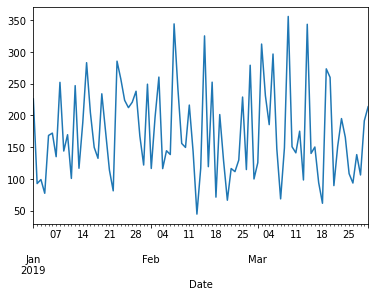

In [97]:
df['Date'] = df['Date'].astype('datetime64[ns]')

sorted_data = df.sort_values(by='Date',ascending=True).groupby('Date').sum()

fig, axes = plt.subplots()
sorted_data['gross income'].plot(kind='line',ax=axes)

In [83]:
group1 = df.groupby(['Date','City'])['gross income'].sum().reset_index()
yagon = group1.query("City == 'Yangon'")
nay = group1.query("City == 'Naypyitaw'")
man = group1.query("City == 'Mandalay'")

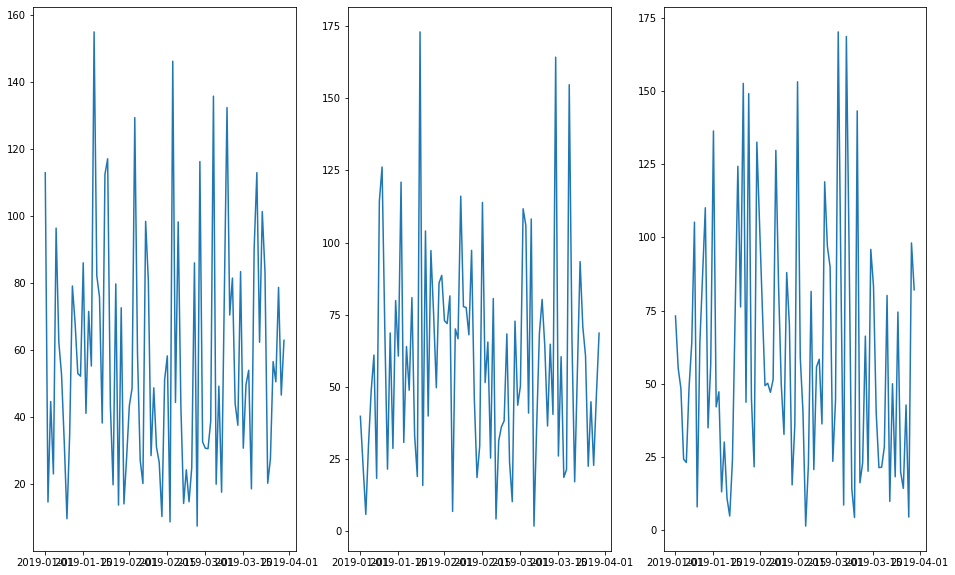

In [89]:
fig99, ax99 = plt.subplots(ncols=3,figsize=(16,10))
ax99[0].plot(yagon['Date'],yagon['gross income'],label='Yangon')
ax99[1].plot(nay['Date'],nay['gross income'],label='Naypyitaw')
ax99[2].plot(man['Date'],man['gross income'],label='Mandalay')

In [72]:
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

**Melihat elemen dari kolom city**

In [41]:
df.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

**Melihat informasi ringkas dari data**

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

**Mengubah type Date dari object menjadi datetime**

In [43]:
df['Date'] = pd.to_datetime(df['Date'])

**Cek jumlah missing value**

In [44]:
cek = pd.DataFrame(df.isnull().sum(), columns=['Jumlah Missing Values'])
cek['% Missing Values'] = (cek/len(df)).round(2)*100
cek

,Jumlah Missing Values,% Missing Values
Invoice ID,0,0.0
Branch,0,0.0
City,0,0.0
Customer type,0,0.0
Gender,0,0.0
Product line,0,0.0
Unit price,0,0.0
Quantity,0,0.0
Tax 5%,0,0.0
Total,0,0.0


*Terlihat data yang akan digunakan tampaknya bersih dari missing value*

# **E. Exploratory Data Analysis (EDA)**

**Visualisasi kolom Gender**

<AxesSubplot:ylabel='Gender'>

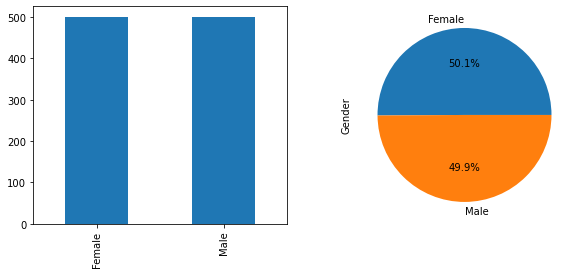

In [45]:
fig, axs = plt.subplots(ncols=2, figsize=(10,4))
df['Gender'].value_counts().plot(kind='bar', ax=axs[0])
df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle = 0, ax=axs[1])

**Visualisasi Kolom Gender dan Customer Type**

*Kami ingin melihat perbandingan antara kolom Gender dan Customer type*

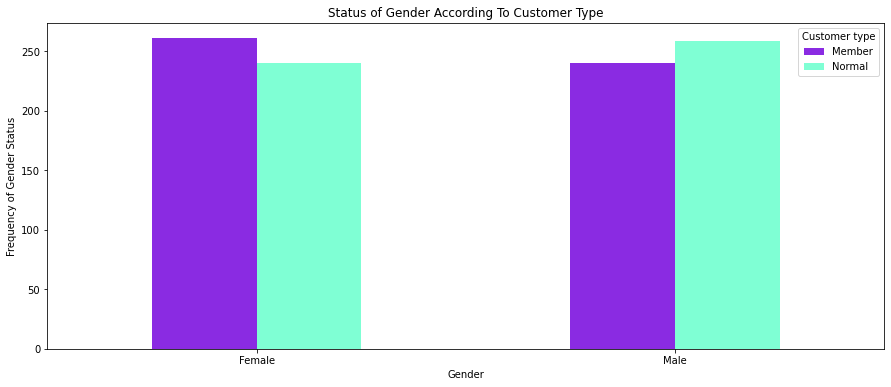

In [46]:
pd.crosstab(df.Gender, df['Customer type']).plot(kind="bar",figsize=(15,6),color=['#8A2BE2','#7FFFD4'])
plt.title('Status of Gender According To Customer Type')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Gender Status')
plt.show()

**Visualisasi Kolom Product Line Terhadap Kolom City**

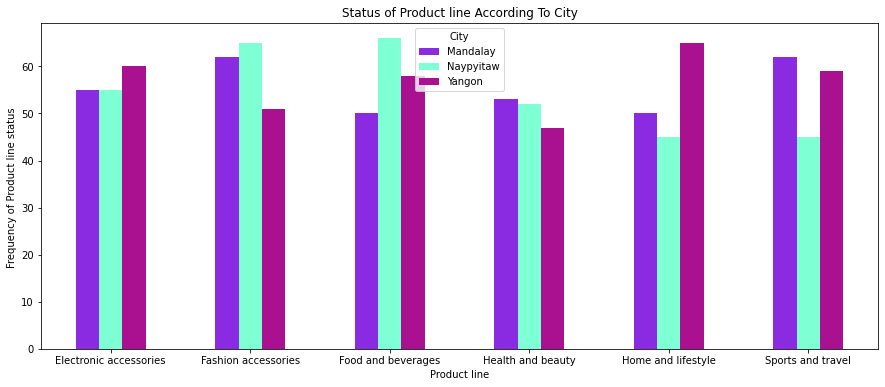

In [47]:
pd.crosstab(df['Product line'], df['City']).plot(kind="bar",figsize=(15,6),color=['#8A2BE2','#7FFFD4','#AA1190'])
plt.title('Status of Product line According To City')
plt.xlabel('Product line')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Product line status ')
plt.show()

**Visualisasi Kolom Gender Terhadap City**

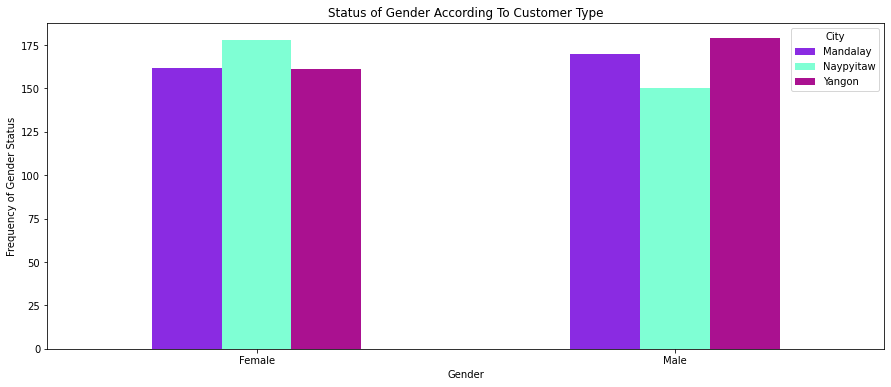

In [48]:
pd.crosstab(df['Gender'], df['City']).plot(kind="bar",figsize=(15,6),color=['#8A2BE2','#7FFFD4','#AA1190'])
plt.title('Status of Gender According To Customer Type')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Gender Status')
plt.show()

**Visualisasi Kolom Gender Terhadap Payment**

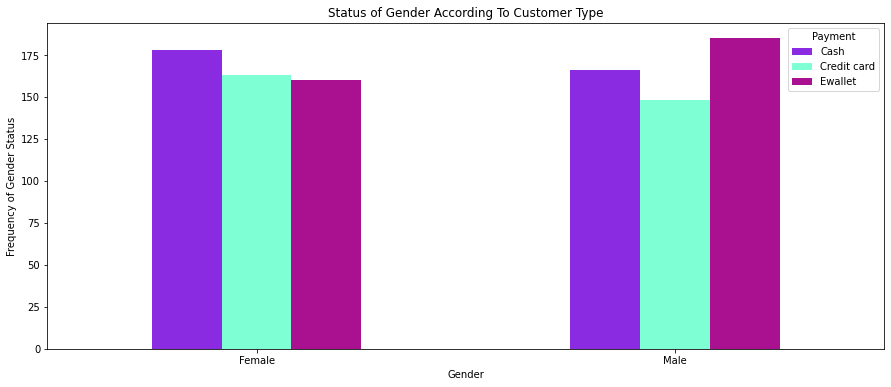

In [49]:
pd.crosstab(df.Gender, df['Payment']).plot(kind="bar",figsize=(15,6),color=['#8A2BE2','#7FFFD4','#AA1190'])
plt.title('Status of Gender According To Customer Type')
plt.xlabel('Gender')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Gender Status')
plt.show()

*Dari visualisasi diatas terlihat bahwa :*
- *Gender Female lebih dominan melakukan Payment Cash dibandingkan Male*
- *Gender Female lebih dominan melakukan Payment Credit card dibandingkan Male*
- *Gender Female kurang dominan melakukan Payment Ewallet dibandingkan Male* 

**Shorting berdasarkan gender Female**

In [50]:
male = df[df['Gender']=='Male'].sort_values(by='Date').reset_index(drop=True)
male.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,770-42-8960,B,Mandalay,Normal,Male,Food and beverages,21.12,8,8.448,177.408,2019-01-01,19:31,Cash,168.96,4.761905,8.448,6.3
1,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,2019-01-01,10:39,Credit card,435.66,4.761905,21.783,6.9
2,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,2019-01-01,11:43,Cash,125.74,4.761905,6.287,5.0
3,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,2019-01-01,14:47,Cash,380.72,4.761905,19.036,5.7
4,712-39-0363,A,Yangon,Member,Male,Food and beverages,41.66,6,12.498,262.458,2019-01-02,15:24,Ewallet,249.96,4.761905,12.498,5.6


**Shorting berdasarkan gender Female**

In [51]:
famale = df[df['Gender']=='Female'].sort_values(by='Date').reset_index(drop=True)
famale.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,493-65-6248,C,Naypyitaw,Member,Female,Sports and travel,36.98,10,18.490,388.290,2019-01-01,19:48,Credit card,369.80,4.761905,18.490,7.0
1,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,2019-01-01,14:42,Credit card,742.20,4.761905,37.110,4.3
2,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,2019-01-01,20:26,Ewallet,108.16,4.761905,5.408,6.9
3,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,2019-01-01,13:55,Cash,591.66,4.761905,29.583,7.7
4,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,2019-01-01,11:36,Credit card,846.30,4.761905,42.315,9.0


In [52]:
numeric_column = df.select_dtypes(include=np.number)
numeric_column.head(2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6


# **F. MEASURE OF CENTRAL TENDENCY**

**Mean**

In [53]:
print(f"Mean Dari Kolom Numerik\n {numeric_column.mean()}")

Mean Dari Kolom Numerik
 Unit price                  55.672130
Quantity                     5.510000
Tax 5%                      15.379369
Total                      322.966749
cogs                       307.587380
gross margin percentage      4.761905
gross income                15.379369
Rating                       6.972700
dtype: float64


**Median**

In [54]:
print(f"Median Dari Kolom Numerik\n {numeric_column.median()}")

Median Dari Kolom Numerik
 Unit price                  55.230000
Quantity                     5.000000
Tax 5%                      12.088000
Total                      253.848000
cogs                       241.760000
gross margin percentage      4.761905
gross income                12.088000
Rating                       7.000000
dtype: float64


**Modus**

In [55]:
print(f"Modus Dari Kolom Unit price\n {numeric_column['Unit price'].mode()}")

Modus Dari Kolom Unit price
 0    83.77
dtype: float64


# **G. MEASURE OF VARIANCE**

**Range**

In [56]:
numcols = numeric_column
for c in numcols:
    print(f'{df[c].name} Range {str(df[c].max() - df[c].min())}')

Unit price Range 89.88
Quantity Range 9
Tax 5% Range 49.1415
Total Range 1031.9715
cogs Range 982.83
gross margin percentage Range 0.0
gross income Range 49.1415
Rating Range 6.0


**Variance**

In [57]:
print(f"Variance Dari Kolom Numerik\n{numeric_column.var()}")

Variance Dari Kolom Numerik
Unit price                 7.019653e+02
Quantity                   8.546446e+00
Tax 5%                     1.370966e+02
Total                      6.045960e+04
cogs                       5.483864e+04
gross margin percentage    3.759526e-27
gross income               1.370966e+02
Rating                     2.953518e+00
dtype: float64


**Standard Deviation**

In [58]:
print(f"Standar Deviasi Dari Kolom Numerik\n{numeric_column.std()}")

Standar Deviasi Dari Kolom Numerik
Unit price                 2.649463e+01
Quantity                   2.923431e+00
Tax 5%                     1.170883e+01
Total                      2.458853e+02
cogs                       2.341765e+02
gross margin percentage    6.131498e-14
gross income               1.170883e+01
Rating                     1.718580e+00
dtype: float64


# **H. HYPOTHESIS TESTING**

# Chi Square Test

Kami tertarik ingin memeriksa apakah terdapat hubungan antara Gender dengan Customer type? berdasarkan kasus tersebut kami melakukan uji Chi Square Test dengan nilai Alpha = 0.05. Adapun hypothesis yang digunakan ialah :

- **H0: Tidak ada hubungan** 

- **H1: Ada hubungan**

**Menampilkan Kolom Customer type dan Gender**

In [59]:
df[['Customer type','Gender']]

,Customer type,Gender
0,Member,Female
1,Normal,Female
2,Normal,Male
3,Member,Male
4,Normal,Male
...,...,...
995,Normal,Male
996,Normal,Female
997,Member,Male
998,Normal,Male


In [60]:
contingency_table = pd.crosstab(df['Gender'],df['Customer type'])
contingency_table

Customer type,Member,Normal
Gender,,
Female,261,240
Male,240,259


**Melakukan uji chisquare test**

In [61]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.230
Probably independent


Karena nilai **P-value di atas 0.05** maka **terima H0** yaitu tidak terdapat hubungan antara Gender dengan Customer type.

# Paired Test

**Memeriksa retention gender**

In [62]:
male_version = df[df['Gender']=='Male']['Customer type'].replace({'Member':1,'Normal':0})
famale_version = df[df['Gender']=='Female']['Customer type'].replace({'Member':1,'Normal':0})

print(f'Retention rate of gender Male ',male_version.sum()/male_version.count())
print(f'Retention rate of gender Female ',famale_version.sum()/famale_version.count())


Retention rate of gender Male  0.48096192384769537
Retention rate of gender Female  0.5209580838323353


**Berdasarkan retention antara Gender terdapat perbedaan. Kami tertarik ingin memastikan apakah perbedaan ini bersifat sama atau hanyalah kebetulan? Untuk memastikan hasil yang diperoleh, kami akan melakukan uji menggunakan Paired Test. Adapun hypothesis yang kami gunakan ialah :**

**H0: μ_Male = μ_Female**

**H1: μ_Male != μ_Female**


In [63]:
t_stat,p_val = stats.ttest_rel(male_version.sample(400),famale_version.sample(400)) #we take 40000 sample of each data to make the size the same.
print('P-value:',p_val)

P-value: 0.31791657064611517


**Grafik Uji Paired Test**

c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


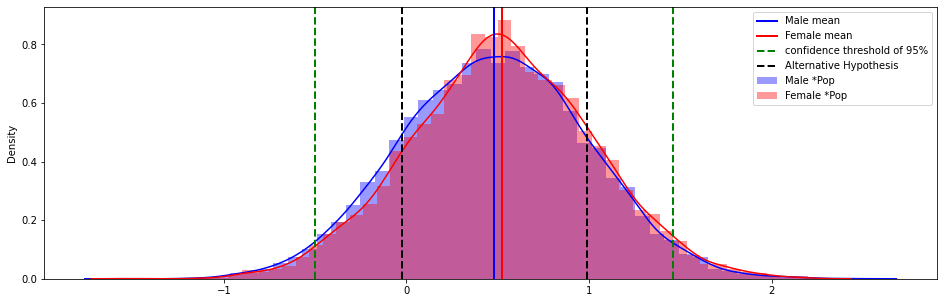

In [73]:
male_pop = np.random.normal(male_version.mean(),male_version.std(),10000)
female_pop = np.random.normal(famale_version.mean(),famale_version.std(),10000)

ci = stats.norm.interval(0.95, male_version.mean(), male_version.std())
plt.figure(figsize=(16,5))
sns.distplot(male_pop, label='Male *Pop',color='blue')
sns.distplot(female_pop, label='Female *Pop',color='red')

plt.axvline(male_version.mean(), color='blue', linewidth=2, label='Male mean')
plt.axvline(famale_version.mean(), color='red',  linewidth=2, label='Female mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(male_pop.mean()+t_stat*male_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(male_pop.mean()-t_stat*male_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Karena **P-Value di atas 0.05** maka kami **gagal menolak H0** yang mengindikasikan antara gender Male dan Female memiliki retention yang sama 

# **G. KESIMPULAN**

# Measure Of Central Tendency

In [ ]:
'''
Mean Dari Kolom Numerik

Unit price                  55.672130
Quantity                     5.510000
Tax 5%                      15.379369
Total                      322.966749
cogs                       307.587380
gross margin percentage      4.761905
gross income                15.379369
Rating                       6.972700

Median Dari Kolom Numerik

Unit price                  55.230000
Quantity                     5.000000
Tax 5%                      12.088000
Total                      253.848000
cogs                       241.760000
gross margin percentage      4.761905
gross income                12.088000
Rating                       7.000000

Modus Dari Kolom Unit price     83.77

'''

'\nMean Dari Kolom Numerik\n\nUnit price                  55.672130\nQuantity                     5.510000\nTax 5%                      15.379369\nTotal                      322.966749\ncogs                       307.587380\ngross margin percentage      4.761905\ngross income                15.379369\nRating                       6.972700\n\nMedian Dari Kolom Numerik\n\nUnit price                  55.230000\nQuantity                     5.000000\nTax 5%                      12.088000\nTotal                      253.848000\ncogs                       241.760000\ngross margin percentage      4.761905\ngross income                12.088000\nRating                       7.000000\n\nModus Dari Kolom Unit price     83.77\n\n'

# Measure of Variance

In [ ]:
'''
Range

Unit price Range        89.88
Quantity Range          9
Tax 5% Range            49.1415
Total Range             1031.9715
cogs Range              982.83
gross margin percentage Range 0.0
gross income Range      49.1415
Rating Range            6.0

Variance Dari Kolom Numerik

Unit price                 7.019653e+02
Quantity                   8.546446e+00
Tax 5%                     1.370966e+02
Total                      6.045960e+04
cogs                       5.483864e+04
gross margin percentage    3.759526e-27
gross income               1.370966e+02
Rating                     2.953518e+00

Standar Deviasi Dari Kolom Numerik

Unit price                 2.649463e+01
Quantity                   2.923431e+00
Tax 5%                     1.170883e+01
Total                      2.458853e+02
cogs                       2.341765e+02
gross margin percentage    6.131498e-14
gross income               1.170883e+01
Rating                     1.718580e+00
dtype: float64

'''

'\nRange\n\nUnit price Range        89.88\nQuantity Range          9\nTax 5% Range            49.1415\nTotal Range             1031.9715\ncogs Range              982.83\ngross margin percentage Range 0.0\ngross income Range      49.1415\nRating Range            6.0\n\nVariance Dari Kolom Numerik\n\nUnit price                 7.019653e+02\nQuantity                   8.546446e+00\nTax 5%                     1.370966e+02\nTotal                      6.045960e+04\ncogs                       5.483864e+04\ngross margin percentage    3.759526e-27\ngross income               1.370966e+02\nRating                     2.953518e+00\n\nStandar Deviasi Dari Kolom Numerik\n\nUnit price                 2.649463e+01\nQuantity                   2.923431e+00\nTax 5%                     1.170883e+01\nTotal                      2.458853e+02\ncogs                       2.341765e+02\ngross margin percentage    6.131498e-14\ngross income               1.170883e+01\nRating                     1.718580e+00\ndtyp

# Eksploratory Data Analysis (EDA)

**Male vs Female**
- Presentase gender Female 50.1% dan Male 49.9%

**Gender vs Customer Type**
- Customer type member lebih dominan Female, dan Customer type normal lebih dominan Male

**Product Line vs City**
- Product line Electrinic accessories lebih dominan dikota Yagon dibandingkan dengan kota Mandalay dan Naypyitaw
- Product line Fashion accessories lebih dominan dikota Naypyitaw dibandingkan dengan kota Mandalay dan Yagon
- Product line Food and beverages lebih dominan dikota Naypyitaw dibandingkan dengan kota Mandalay dan Yagon
- Product line Health and beauty lebih dominan dikota Mandalay dibandingkan dengan kota Naypyitaw dan Yagon
- Product line Home and lifestyle lebih dominan dikota Yagon dibandingkan dengan kota Naypyitaw dan Mandalay
- Product line Sports and travel lebih dominan dikota Mandalay dibandingkan dengan kota Naypyitaw dan Yagon

**Gender vs City**
- City Naypyitaw gender Female lebih dominan dibandingkan Male
- City Yagon gender Female kurang dominan dibandingkan Male

**Gender vs Payment**
- Gender Female lebih dominan melakukan Payment Cash dibandingkan Male
- Gender Female lebih dominan melakukan Payment Credit card dibandingkan Male
- Gender Female kurang dominan melakukan Payment Ewallet dibandingkan Male

# Hypothesisi Testing

- Berdasarkan uji paired test gender male dan female memiliki retention yang sama
- Berdasarkan uji chi square test tidak terdapat hubungan antara Gender dengan Customer type 